In [1]:
import pandas as pd
import requests
from zipfile import ZipFile
import io
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/rushabh1809-bot/MN5813-GRP-3/main/athlete_eventsgrp.csv.zip'

retrived_url = requests.get(url)
zip_file = ZipFile(io.BytesIO(retrived_url.content))

df= pd.read_csv(zip_file.open('athlete_events.csv'))
df.head()




,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


The data set of the olympic data has been loaded in from a zipcode in Github and 5 rows has been shown of the data frame to ensure it has loaded in

In [2]:
print('What columns are in our data set:')
print(df.columns)


What columns are in our data set:
Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


In [3]:
duplicated_data=df.duplicated().sum()
print(f'Amount of duplicates in data set: {duplicated_data}')




Amount of duplicates in data set: 1385


In [4]:
df=df.drop_duplicates()


Duplicates are deleted


In [5]:
df['Height']=df['Height'].fillna(df['Height'].median())
df['Weight']=df['Weight'].fillna(df['Weight'].median())
df['Age']=df['Age'].fillna(df['Age'].median())
df['Medal']=df['Medal'].fillna('No Medal')

Nan values have been changed into median of data so data can be easily analysed without it being skewed, we assumed nan values for medals meant that the athlete didnt recieve a medal. 

In [6]:
medal_table = pd.pivot_table(
    df,
    index='NOC',     
    columns='Year',     
    values='Medal',     
    aggfunc='count',      
    fill_value=0         
)

medal_table


Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
NOC,,,,,,,,,,,,,,,,,,,,,
AFG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,4,0,6,0,3
AHO,0,0,0,0,0,0,0,0,0,0,...,0,8,0,3,0,4,0,0,0,0
ALB,0,0,0,0,0,0,0,0,0,0,...,0,5,0,7,3,12,2,10,2,6
ALG,0,0,0,0,0,0,0,0,0,0,...,0,51,0,71,3,57,1,39,0,74
AND,0,0,0,0,0,0,0,0,0,0,...,7,5,5,6,10,5,20,6,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YEM,0,0,0,0,0,0,0,0,0,0,...,0,2,0,3,0,8,0,4,0,3
YMD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YUG,0,0,0,0,0,0,15,121,94,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
melted_df = df.melt(
    id_vars='NOC',
    var_name='MedalType',
    value_name='Count'
)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


In [8]:
sport_season_crosstab = pd.crosstab(
    df['Sport'],
    df['Season']
)

sport_season_crosstab


Season,Summer,Winter
Sport,,
Aeronautics,1,0
Alpine Skiing,0,8829
Alpinism,4,21
Archery,2334,0
Art Competitions,2263,0
...,...,...
Tug-Of-War,170,0
Volleyball,3404,0
Water Polo,3846,0


In [9]:
sport_season_medals = pd.pivot_table(
    df,
    index='Sport',
    columns='Season',
    values='Medal',
    aggfunc='sum',
    fill_value=0
)

sport_season_medals


Season,Summer,Winter
Sport,,
Aeronautics,Gold,0
Alpine Skiing,0,No MedalGoldBronzeNo MedalSilverBronzeNo Medal...
Alpinism,GoldGoldGoldGold,GoldGoldGoldGoldGoldGoldGoldGoldGoldGoldGoldGo...
Archery,No MedalNo MedalNo MedalNo MedalNo MedalNo Med...,0
Art Competitions,No MedalNo MedalNo MedalNo MedalNo MedalNo Med...,0
...,...,...
Tug-Of-War,GoldNo MedalGoldNo MedalNo MedalGoldSilverNo M...,0
Volleyball,No MedalNo MedalNo MedalNo MedalNo MedalNo Med...,0
Water Polo,No MedalGoldNo MedalNo MedalNo MedalNo MedalNo...,0


In [10]:
df_multi = df.set_index(['NOC','Sport','Event']).sort_index()
df_multi


ID  \
NOC Sport         Event                                      
AFG Athletics     Athletics Men's 100 metres          6336   
                  Athletics Men's 100 metres          6336   
                  Athletics Men's 100 metres          6336   
                  Athletics Men's 100 metres         39920   
                  Athletics Men's 100 metres         59161   
...                                                    ...   
ZIM Tennis        Tennis Women's Singles             82928   
    Triathlon     Triathlon Men's Olympic Distance   34530   
                  Triathlon Men's Olympic Distance   34530   
                  Triathlon Men's Olympic Distance   74696   
    Weightlifting Weightlifting Men's Heavyweight I  24958   

                                                                                  Name  \
NOC Sport         Event                                                                  
AFG Athletics     Athletics Men's 100 metres                              Masoud Azizi   
                  Athletics Men's 100 metres                              Masoud Azizi   
                  Athletics Men's 100 metres                              Masoud Azizi   
                  Athletics Men's 100 metres                             Abdul Ghafoor   
                  Athletics Men's 100 metres                    Mohammad Mohammad Khan   
...                                                                                ...   
ZIM Tennis        Tennis Women's Singles                     Julia Corinne Muir (-Sim)   
    Triathlon     Triathlon Men's Olympic Distance   Christopher James "Chris" Felgate   
                  Triathlon Men's Olympic Distance   Christopher James "Chris" Felgate   
                  Triathlon Men's Olympic Distance                       Mark Marabini   
    Weightlifting Weightlifting Men's Heavyweight I                 Addison Brian Dale   

                                                    Sex   Age  Height  Weight  \
NOC Sport         Event                                                         
AFG Athletics     Athletics Men's 100 metres          M  19.0   168.0    64.0   
                  Athletics Men's 100 metres          M  23.0   168.0    64.0   
                  Athletics Men's 100 metres          M  27.0   168.0    64.0   
                  Athletics Men's 100 metres          M  26.0   175.0    70.0   
                  Athletics Men's 100 metres          M  25.0   175.0    70.0   
...                                                  ..   ...     ...     ...   
ZIM Tennis        Tennis Women's Singles              F  17.0   167.0    59.0   
    Triathlon     Triathlon Men's Olympic Distance    M  26.0   189.0    77.0   
                  Triathlon Men's Olympic Distance    M  30.0   189.0    77.0   
                  Triathlon Men's Olympic Distance    M  35.0   181.0    75.0   
    Weightlifting Weightlifting Men's Heavyweight I   M  37.0   180.0    91.0   

                                                            Team        Games  \
NOC Sport         Event                                                         
AFG Athletics     Athletics Men's 100 metres         Afghanistan  2004 Summer   
                  Athletics Men's 100 metres         Afghanistan  2008 Summer   
                  Athletics Men's 100 metres         Afghanistan  2012 Summer   
                  Athletics Men's 100 metres         Afghanistan  1996 Summer   
                  Athletics Men's 100 metres         Afghanistan  1936 Summer   
...                                                          ...          ...   
ZIM Tennis        Tennis Women's Singles                Zimbabwe  1988 Summer   
    Triathlon     Triathlon Men's Olympic Distance      Zimbabwe  2008 Summer   
                  Triathlon Men's Olympic Distance      Zimbabwe  2012 Summer   
                  Triathlon Men's Olympic Distance      Zimbabwe  2000 Summer   
    Weightlifting Weightlifting Men's Heavyweight I 

In [11]:
df_multi.xs('USA', level='NOC')



ID  \
Sport         Event                                               
Alpine Skiing Alpine Skiing Men's Combined                12204   
              Alpine Skiing Men's Combined                14635   
              Alpine Skiing Men's Combined                30856   
              Alpine Skiing Men's Combined                35127   
              Alpine Skiing Men's Combined                35762   
...                                                         ...   
Wrestling     Wrestling Women's Lightweight, Freestyle   124558   
              Wrestling Women's Middleweight, Freestyle   77851   
              Wrestling Women's Middleweight, Freestyle   79929   
              Wrestling Women's Middleweight, Freestyle   95168   
              Wrestling Women's Middleweight, Freestyle   95168   

                                                                                       Name  \
Sport         Event                                                                           
Alpine Skiing Alpine Skiing Men's Combined                          Robert "Bob" Blatt, Jr.   
              Alpine Skiing Men's Combined                                 Will Brandenburg   
              Alpine Skiing Men's Combined               Richard Henry "Dick" Durrance, Jr.   
              Alpine Skiing Men's Combined                                 Jakub Paul Fiala   
              Alpine Skiing Men's Combined                                   Chad Fleischer   
...                                                                                     ...   
Wrestling     Wrestling Women's Lightweight, Freestyle                     Marcie Van Dusen   
              Wrestling Women's Middleweight, Freestyle                         Sara McMann   
              Wrestling Women's Middleweight, Freestyle                 Randi Criner Miller   
              Wrestling Women's Middleweight, Freestyle         Elena Sergeyevna Pirozhkova   
              Wrestling Women's Middleweight, Freestyle         Elena Sergeyevna Pirozhkova   

                                                        Sex   Age  Height  \
Sport         Event                                                         
Alpine Skiing Alpine Skiing Men's Combined                M  26.0   181.0   
              Alpine Skiing Men's Combined                M  23.0   185.0   
              Alpine Skiing Men's Combined                M  21.0   175.0   
              Alpine Skiing Men's Combined                M  26.0   183.0   
              Alpine Skiing Men's Combined                M  22.0   188.0   
...                                                      ..   ...     ...   
Wrestling     Wrestling Women's Lightweight, Freestyle    F  26.0   165.0   
              Wrestling Women's Middleweight, Freestyle   F  23.0   167.0   
              Wrestling Women's Middleweight, Freestyle   F  24.0   157.0   
              Wrestling Women's Middleweight, Freestyle   F  25.0   168.0   
              Wrestling Women's Middleweight, Freestyle   F  29.0   168.0   

                                                         Weight  \
Sport         Event                                               
Alpine Skiing Alpine Skiing Men's Combined                 76.0   
              Alpine Skiing Men's Combined                 89.0   
              Alpine Skiing Men's Combined                 70.0   
              Alpine Skiing Men's Combined                 93.0   
              Alpine Skiing Men's Combined                102.0   
...                                                         ...   
Wrestling     Wrestling Women's Lightweight, Freestyle     55.0   
              Wrestling Women's Middleweight, Freestyle    62.0   
              Wrestling Women's Middleweight, Freestyle    63.0   
              Wrestling Women's Middleweight, Freestyle    72.0   
              Wrestling Women's Middleweight, Freestyle    72.0   

                                                                  Team  \
Sport

In [12]:
df_multi.xs(('USA','Swimming'), level=('NOC','Sport'))


,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Medal
Event,,,,,,,,,,,,
"Swimming Men's 1,200 metres Freestyle",130597,Gardner Boyd Williams,M,18.0,175.0,70.0,United States,1896 Summer,1896,Summer,Athina,No Medal
"Swimming Men's 1,500 metres Freestyle",12940,Eugene Thomas Bolden,M,20.0,175.0,70.0,United States,1920 Summer,1920,Summer,Antwerpen,No Medal
"Swimming Men's 1,500 metres Freestyle",14863,George Thomas Breen,M,21.0,183.0,83.0,United States,1956 Summer,1956,Summer,Melbourne,Bronze
"Swimming Men's 1,500 metres Freestyle",14863,George Thomas Breen,M,25.0,183.0,83.0,United States,1960 Summer,1960,Summer,Roma,Bronze
"Swimming Men's 1,500 metres Freestyle",15762,"Thomas ""Carlton"" Bruner",M,24.0,175.0,55.0,United States,1996 Summer,1996,Summer,Atlanta,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...
Swimming Women's 800 metres Freestyle,110722,Ann Linnaea Simmons,F,19.0,163.0,57.0,United States,1972 Summer,1972,Summer,Munich,No Medal
Swimming Women's 800 metres Freestyle,112334,Leah Smith,F,21.0,178.0,67.0,United States,2016 Summer,2016,Summer,Rio de Janeiro,No Medal
Swimming Women's 800 metres Freestyle,129370,"Wendy Weinberg (-Farber, -Weil)",F,18.0,168.0,57.0,United States,1976 Summer,1976,Summer,Montreal,Bronze


In [13]:
df['Year']= pd.to_datetime(df['Year'], format= '%Y')
df['Century']= (df['Year'].dt.year//100)+1

In [14]:
bins=[0,20,40,60,80,100]
labels= ['0-20', '20-40', '40-60', '60-80','80-100']
df['Age group']= pd.cut(df['Age'], bins=bins, labels=labels,right=False)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Century,Age group
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992-01-01,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,20,20-40
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012-01-01,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,21,20-40
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920-01-01,Summer,Antwerpen,Football,Football Men's Football,No Medal,20,20-40
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,20,20-40
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988-01-01,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,20,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976-01-01,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal,20,20-40
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014-01-01,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal,21,20-40
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014-01-01,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal,21,20-40
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998-01-01,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal,20,20-40


In [15]:
average_age_event= df.groupby('Event')['Age'].mean().astype(int)
#Average age by event    
plt.figure(figsize=(10,4))
plt.barh(average_age_event.index, average_age_event.value)
plt.xlabel('Event')
plt.ylabel('Average age')

Event
Aeronautics Mixed Aeronautics                     26
Alpine Skiing Men's Combined                      24
Alpine Skiing Men's Downhill                      24
Alpine Skiing Men's Giant Slalom                  23
Alpine Skiing Men's Slalom                        23
                                                  ..
Wrestling Women's Flyweight, Freestyle            24
Wrestling Women's Heavyweight, Freestyle          25
Wrestling Women's Light-Heavyweight, Freestyle    24
Wrestling Women's Lightweight, Freestyle          25
Wrestling Women's Middleweight, Freestyle         25
Name: Age, Length: 765, dtype: int64

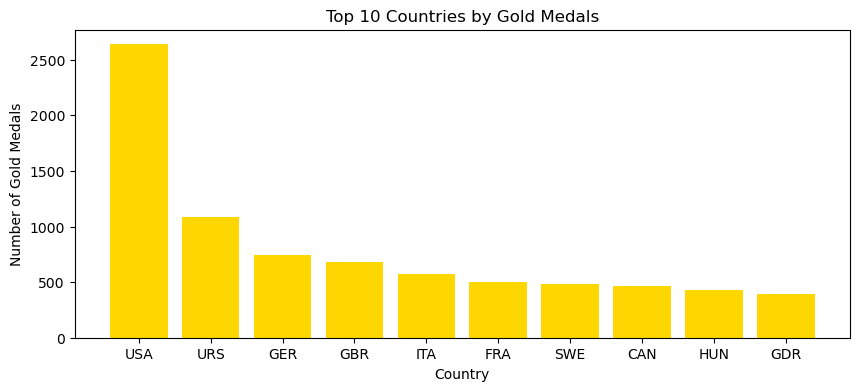

In [38]:
gold_medal=df[df['Medal']=='Gold']
top_10=gold_medal.groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)
#Top 10 countries by gold medals 

plt.figure(figsize=(10,4))                
plt.bar(top_10.index, top_10.values, color='gold')  
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.title('Top 10 Countries by Gold Medals')
plt.show()

In [17]:
df.groupby(['Name','Sport'])['Medal'].count().sort_values(ascending=False)
#Medals per athlete by sport

Name                                     Sport     
Heikki Ilmari Savolainen                 Gymnastics    39
Joseph "Josy" Stoffel                    Gymnastics    38
Ioannis Theofilakis                      Shooting      36
Andreas Wecker                           Gymnastics    32
Alexandros Theofilakis                   Shooting      32
                                                       ..
A. Hurtado Vargas                        Water Polo     1
A. Hussain Ahmed                         Football       1
A. J. J. Fridt                           Sailing        1
A. J. Tyronne Benildus "Benny" Fernando  Athletics      1
Sven Schultze                            Basketball     1
Name: Medal, Length: 136588, dtype: int64